In [1]:
!pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 59.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import nltk
import re
import sklearn.feature_extraction.text as text
from collections import Counter
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pyvi import ViTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
file = '/content/drive/MyDrive/PBL6/dataFakeNewsKhoi8406-2k.csv'
file2 = '/content/drive/MyDrive/PBL6/dataRealNew2k.csv'
data1 = pd.read_csv(file)
data2 = pd.read_csv(file2)
data = pd.concat([data1,data2], ignore_index=True)

In [5]:

text_example = 'quyết định này sẽ dựa trên sự phê chuẩn hợp pháp, bảo lãnh của nhà nước, thoả thuận về giá bán và khả năng cạnh tranh kinh tế'

In [6]:
data.head(3)

,Title,URL,Content,Label
0,LÝ DO EXONMOBIL CÓ THỂ RỜI KHỎI VIỆT NAM (Tim ...,https://www.khoi8406.com/post/nhanquyenchovn/l...,"Kể từ khi lên cầm quyền vào năm 2013, Tậ...",1
1,TỔNG THỐNG TRUMP PHẢI TRẢ ĐŨA IRAN (Ngô Nhân D...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,1
2,ĐẢNG CỘNG SẢN TRUNG QUỐC SẼ SỤP ĐỔ TRƯỚC NĂM 2...,https://www.khoi8406.com/post/nhanquyenchovn/a...,"Vào ngày 1 tháng 10, để kỷ niệm 70 năm ngày th...",1


# Data Cleansing

In [7]:
data.isnull().sum()

Title       3
URL         0
Content    95
Label       0
dtype: int64

In [8]:
# data quantity chart
def quantity_chart(data):
    label_size = [data.sum(),len(data)-data.sum()]
    plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','Real'],autopct='%1.1f%%')

In [9]:
df = data.dropna()
df = df.drop(df[df['Content']=='* · '].index)

In [10]:
df.isnull().sum()

Title      0
URL        0
Content    0
Label      0
dtype: int64

# Data Pre-processing

Read Vietnamese Stop-words file

In [11]:
with open('/content/drive/MyDrive/PBL6/vietnamese.txt', 'r', encoding = 'utf-8') as file:
    stopwords = file.read().splitlines()

Data Cleaning Functions

In [12]:
#delete numbers
def delete_numbers(text):
    return re.sub(r'\d+', ' ', text)
#lower case
def lower(text):
    return text.lower()
#delete special characters
def remove_special_characters(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!–"#$%&'()*+,،-./:;<=>؟?@[\]^`{|}~“”…"""), ' ', text)
    text = text.replace('؛',"", )
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()
#delete stop words
def remove_stopwords(text):
    words = text.split()
    mean_word = [word for word in words if word not in stopwords]
    mean_text = " ".join(mean_word)
    return mean_text
def preprocess(text):
    text = delete_numbers(text)
    text = lower(text)
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    return text
def preprocess_nostop(text):
    text = delete_numbers(text)
    text = lower(text)
    text = remove_special_characters(text)
    return text

Compound Word and Tokenizer Functions


In [13]:
# Compound Vietnamese word
def tokenizerVN(text):
    return ViTokenizer.tokenize(text)
# Tokenizer
def tokenizer(text):
    return word_tokenize(text)
# Count token
def count_token(text):
    word = tokenizerVN(str(text))
    return len(word.split())
# Word Cloud
def top_count(dt):
    top = Counter([item for sublist in df[dt].apply(lambda x:str(x).split()) for item in sublist])
    temp = pd.DataFrame(top.most_common(50))
    temp.columns = ['Common_words','count']
    temp.style.background_gradient(cmap='Blues')
    return temp
def top_count2(dt):
    top = Counter([item for sublist in df[dt].apply(lambda x:str(x).split()) for item in sublist])
    temp = pd.DataFrame(top.most_common(50))
    temp.columns = ['Common_words_No_SW','count_SW']
    temp.style.background_gradient(cmap='Blues')
    return temp

Apply on data

In [14]:
df['Compound_Content'] = df['Content'].apply(tokenizerVN)
df['Compound_Content_No_SW'] = df['Compound_Content'].apply(preprocess)
df['Compound_Content_SW'] = df['Compound_Content'].apply(preprocess_nostop)

In [15]:
df.head(3)

,Title,URL,Content,Label,Compound_Content,Compound_Content_No_SW,Compound_Content_SW
0,LÝ DO EXONMOBIL CÓ THỂ RỜI KHỎI VIỆT NAM (Tim ...,https://www.khoi8406.com/post/nhanquyenchovn/l...,"Kể từ khi lên cầm quyền vào năm 2013, Tậ...",1,"Kể từ khi lên cầm_quyền vào năm 2013 , Tập_Cận...",cầm_quyền tập_cận_bình đẩy_mạnh hiện_diện trun...,kể từ khi lên cầm_quyền vào năm tập_cận_bình đ...
1,TỔNG THỐNG TRUMP PHẢI TRẢ ĐŨA IRAN (Ngô Nhân D...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,1,Iran chủ_mưu vụ tấn_công vào mấy nhà_máy lọc d...,iran chủ_mưu vụ tấn_công mấy nhà_máy lọc dầu ả...,iran chủ_mưu vụ tấn_công vào mấy nhà_máy lọc d...
2,ĐẢNG CỘNG SẢN TRUNG QUỐC SẼ SỤP ĐỔ TRƯỚC NĂM 2...,https://www.khoi8406.com/post/nhanquyenchovn/a...,"Vào ngày 1 tháng 10, để kỷ niệm 70 năm ngày th...",1,"Vào ngày 1 tháng 10 , để kỷ_niệm 70 năm ngày t...",kỷ_niệm thành_lập cộng_hòa nhân_dân trung_hoa ...,vào ngày tháng để kỷ_niệm năm ngày thành_lập n...


Visualize Functions

In [16]:
# Top common words column
def top_count_column(dt):
    top = Counter([item for sublist in df[dt].apply(lambda x: str(x).split()) for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words', 'count']

    # Visualization
    plt.figure(figsize=(12, 8))
    plt.barh(temp['Common_words'][::-1], temp['count'][::-1], color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Common Words')
    plt.title('Top 20 Common Words')
    plt.show()

In [17]:
word_count_SW = df['Compound_Content_SW'].apply(count_token)
word_count_no_SW = df['Compound_Content_No_SW'].apply(count_token)

In [18]:
# Plot data distribution
def seaborn_token(word_count):
    df['Word_count_SW'] = word_count
    sns.stripplot(y='Word_count_SW', data = df , jitter=True)

    plt.ylabel('Quantity Token')
    plt.xlabel('Seaborn Strip Plot Count without stop words')
def seaborn_token_no_SW(word_count):
    df['Word_count_no_SW'] = word_count
    sns.stripplot(y='Word_count_no_SW', data =df , jitter=True)

    plt.ylabel('Quantity Token')
    plt.xlabel('Seaborn Strip Plot Count with stop words')

In [19]:
def word_count():
    fig, axs = plt.subplots(1, 2, figsize=(20, 7))

    # Vẽ histogram cho từng mẫu dữ liệu trên các axes tương ứng

    axs[0].hist(df["Word_count_SW"], bins=50)
    axs[1].hist(df["Word_count_no_SW"], bins=50)

    axs[0].set_title('Word count have stop words')
    axs[1].set_title('Word count without stop words')

    # Hiển thị biểu đồ
    plt.show()

In [20]:
def word_cloud(df):
    plt.subplots(figsize=(20, 10))

    wordcloud = WordCloud (
                        background_color = 'white',
                        width = 512,
                        height = 384
                            ).generate(' '.join(df))
    plt.imshow(wordcloud) # image show
    plt.axis('off') # to off the axis of x and y
    plt.savefig('Plotly_World_Cloud.png')
    plt.show()

In [21]:
df.head(3)

,Title,URL,Content,Label,Compound_Content,Compound_Content_No_SW,Compound_Content_SW
0,LÝ DO EXONMOBIL CÓ THỂ RỜI KHỎI VIỆT NAM (Tim ...,https://www.khoi8406.com/post/nhanquyenchovn/l...,"Kể từ khi lên cầm quyền vào năm 2013, Tậ...",1,"Kể từ khi lên cầm_quyền vào năm 2013 , Tập_Cận...",cầm_quyền tập_cận_bình đẩy_mạnh hiện_diện trun...,kể từ khi lên cầm_quyền vào năm tập_cận_bình đ...
1,TỔNG THỐNG TRUMP PHẢI TRẢ ĐŨA IRAN (Ngô Nhân D...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,1,Iran chủ_mưu vụ tấn_công vào mấy nhà_máy lọc d...,iran chủ_mưu vụ tấn_công mấy nhà_máy lọc dầu ả...,iran chủ_mưu vụ tấn_công vào mấy nhà_máy lọc d...
2,ĐẢNG CỘNG SẢN TRUNG QUỐC SẼ SỤP ĐỔ TRƯỚC NĂM 2...,https://www.khoi8406.com/post/nhanquyenchovn/a...,"Vào ngày 1 tháng 10, để kỷ niệm 70 năm ngày th...",1,"Vào ngày 1 tháng 10 , để kỷ_niệm 70 năm ngày t...",kỷ_niệm thành_lập cộng_hòa nhân_dân trung_hoa ...,vào ngày tháng để kỷ_niệm năm ngày thành_lập n...


Top common word have stop words

In [22]:
top_count2 = top_count2("Compound_Content_SW")
top_count2.style.background_gradient(cmap='Blues')

,Common_words_No_SW,count_SW
0,của,46630
1,và,46409
2,là,36543
3,các,31582
4,có,28446
5,trong,27610
6,không,25600
7,cho,24735
8,một,24270
9,người,23786


Top common word without stop words

In [23]:
top_count = top_count("Compound_Content_No_SW")
top_count.style.background_gradient(cmap='Blues')

,Common_words,count
0,việt_nam,11061
1,trung_quốc,7219
2,mỹ,6886
3,có_thể,6284
4,dân,6234
5,hai,5883
6,đi,5841
7,đảng,4536
8,đồng,3754
9,xã_hội,3121


Top 20 Common word horizontal bar chart have stop words

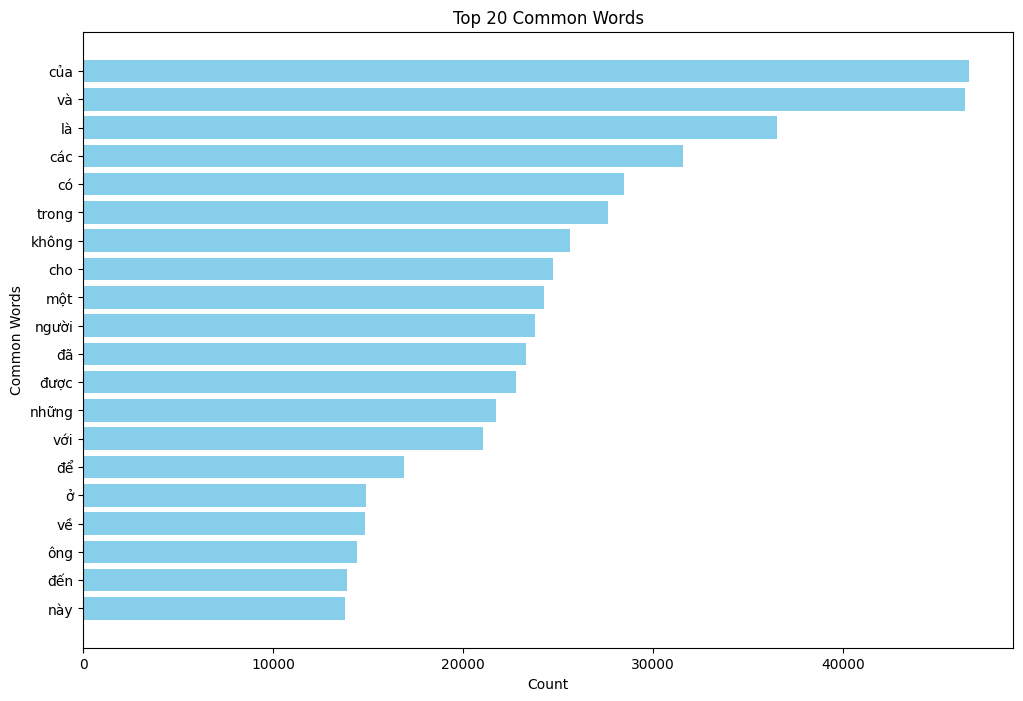

In [24]:
top_count_column('Compound_Content_SW')

Top 20 Common word horizontal bar chart without stop words

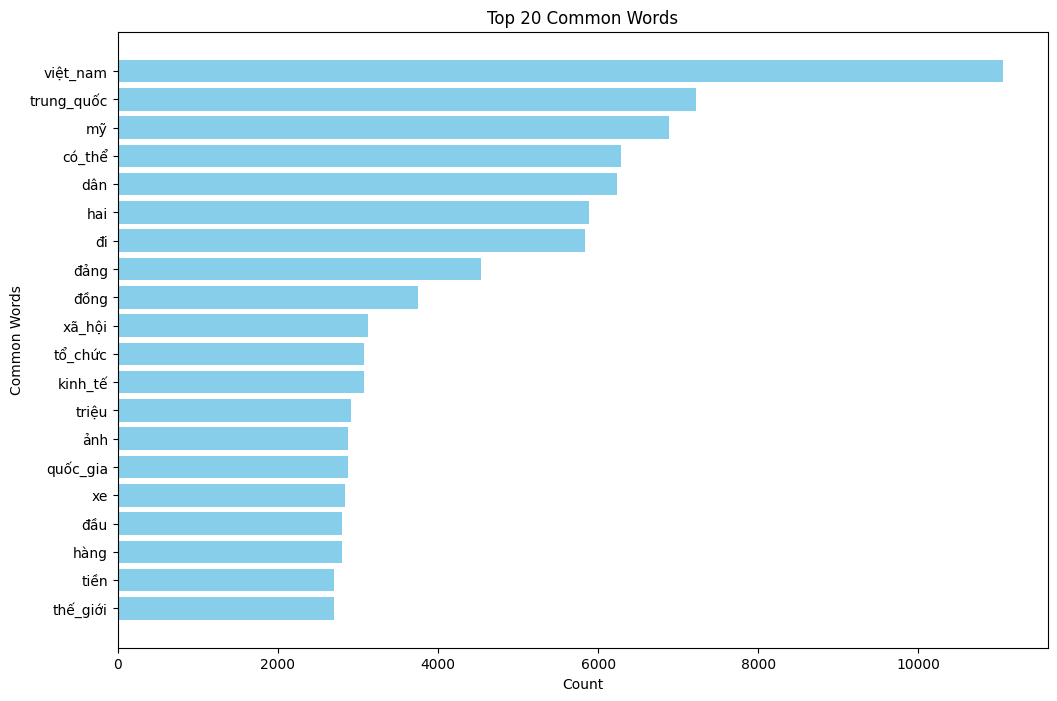

In [25]:
top_count_column('Compound_Content_No_SW')

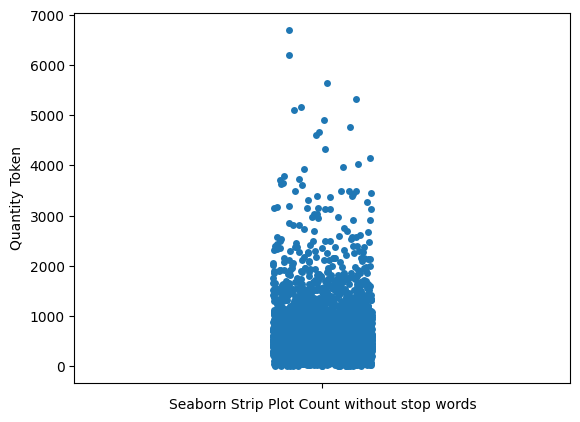

In [26]:
seaborn_token(word_count_SW)

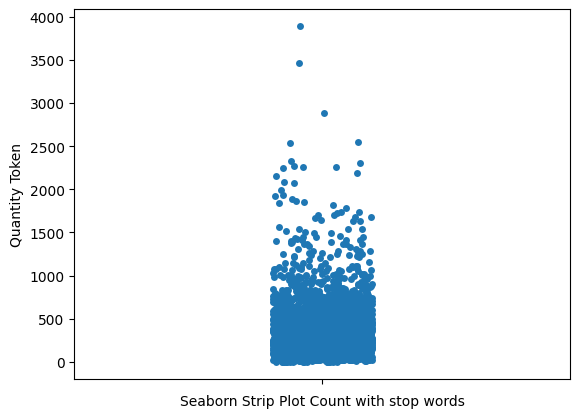

In [27]:
seaborn_token_no_SW(word_count_no_SW)

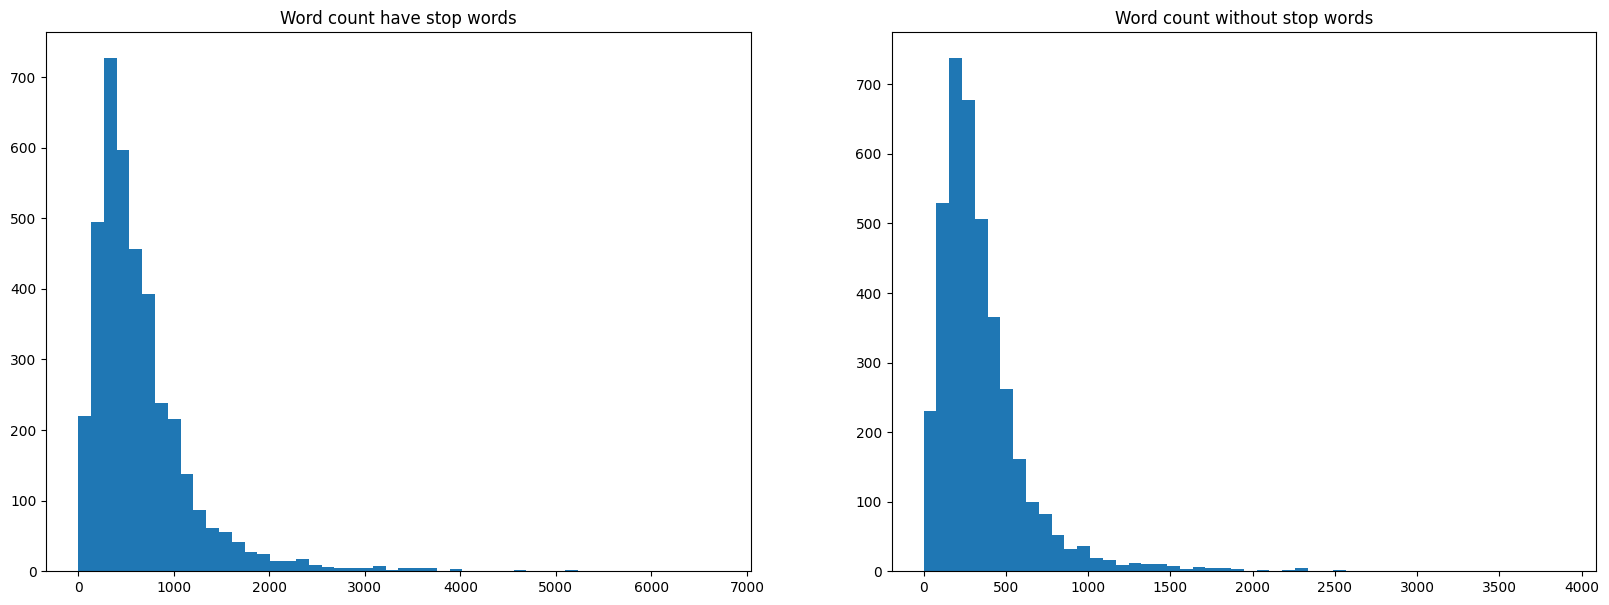

In [28]:
word_count()

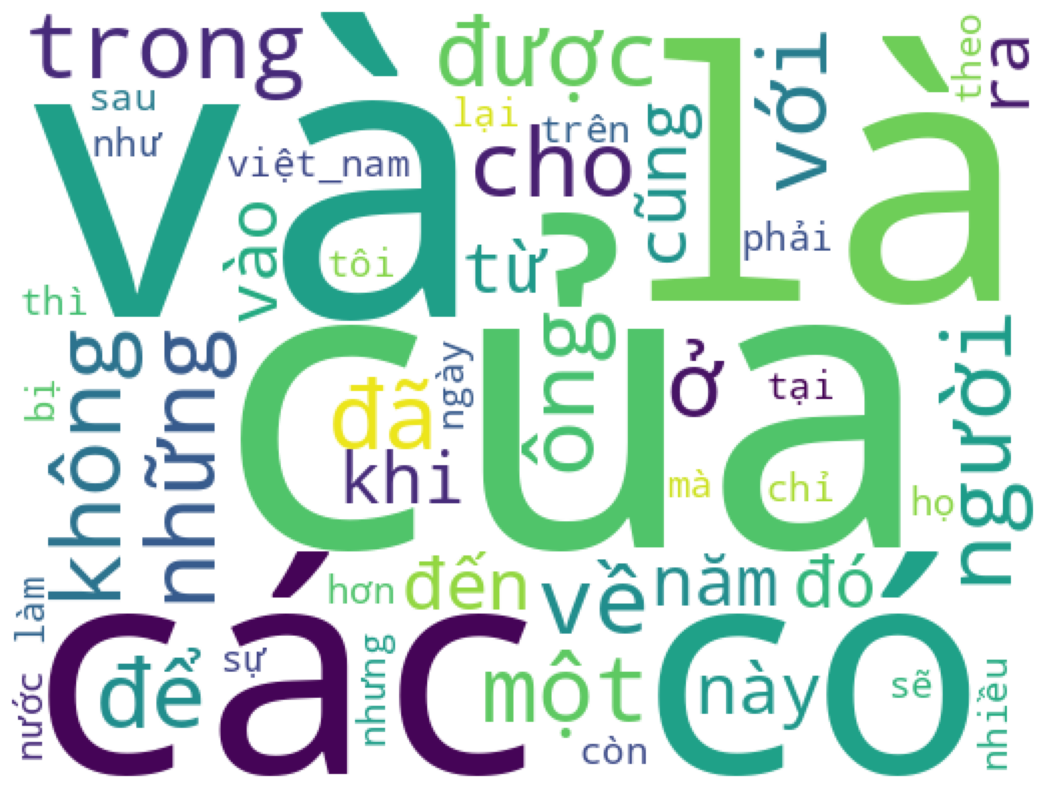

In [29]:
word_cloud(top_count2['Common_words_No_SW'])

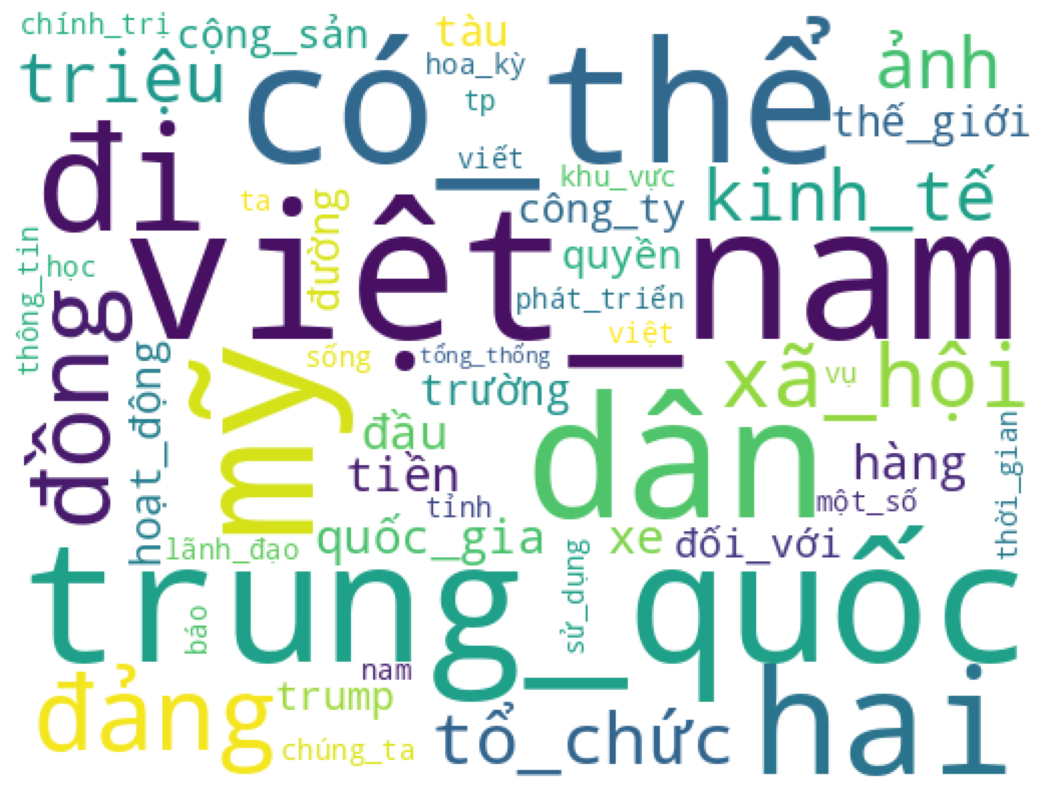

In [30]:
word_cloud(top_count['Common_words'])

In [31]:
!pip install transformers

# Model

In [32]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from transformers import AutoTokenizer, AutoModel
import pickle

In [33]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import model_selection

Tokenizer


In [34]:
X = df['Compound_Content_No_SW'].values
y = df['Label']

In [35]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X)


In [36]:
# Save tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

Create Vocabulary

In [37]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print("Vocab size : ",vocab_size)

Vocab size :  26636


Split train test data

In [38]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(df['Compound_Content_No_SW'],df['Label'].astype(int),test_size=0.2,stratify=df['Label'],random_state=100)


Padding


In [142]:
X_train_ = tokenizer.texts_to_sequences(x_train)
X_train_pad=pad_sequences(X_train_, maxlen = 768, padding='post')
X_test_ = tokenizer.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test_, maxlen = 768, padding = 'post')

Model

In [143]:
from keras.models import Sequential
from keras.layers import Input, Dense, Bidirectional, Reshape, Dropout

EMBEDDING_DIM = 200

BiLSTM_model = Sequential()
BiLSTM_model.add(Embedding(input_dim=10000, output_dim=EMBEDDING_DIM, input_length=768))
BiLSTM_model.add(Dropout(0.2))
BiLSTM_model.add(Bidirectional(CuDNNLSTM(128,return_sequences=True)))
BiLSTM_model.add(Dropout(0.2))
BiLSTM_model.add(Bidirectional(CuDNNLSTM(256,return_sequences=True)))
BiLSTM_model.add(Dropout(0.2))
BiLSTM_model.add(Bidirectional(CuDNNLSTM(128,return_sequences=False)))
BiLSTM_model.add(Dense(1, activation = 'sigmoid'))
BiLSTM_model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adamax(),metrics = 'accuracy')

In [144]:
history_emd= BiLSTM_model.fit(X_train_pad,y_train, epochs = 30, batch_size = 200, validation_data=(X_test_pad, y_test),verbose = 1)

Epoch 1/30
16/16 [==============================] - 22s 1s/step - loss: 0.6623 - accuracy: 0.5665 - val_loss: 0.5335 - val_accuracy: 0.8293
Epoch 2/30
16/16 [==============================] - 16s 1s/step - loss: 0.3697 - accuracy: 0.8564 - val_loss: 0.3853 - val_accuracy: 0.8524
Epoch 3/30
16/16 [==============================] - 16s 989ms/step - loss: 0.2144 - accuracy: 0.9232 - val_loss: 0.2320 - val_accuracy: 0.9063
Epoch 4/30
16/16 [==============================] - 15s 962ms/step - loss: 0.1282 - accuracy: 0.9611 - val_loss: 0.1941 - val_accuracy: 0.9307
Epoch 5/30
16/16 [==============================] - 15s 963ms/step - loss: 0.0924 - accuracy: 0.9737 - val_loss: 0.1755 - val_accuracy: 0.9345
Epoch 6/30
16/16 [==============================] - 15s 943ms/step - loss: 0.0655 - accuracy: 0.9836 - val_loss: 0.1713 - val_accuracy: 0.9345
Epoch 7/30
16/16 [==============================] - 15s 957ms/step - loss: 0.0528 - accuracy: 0.9862 - val_loss: 0.1894 - val_accuracy: 0.9358
Epoch

In [145]:
accuracy = BiLSTM_model.evaluate(X_test_pad, y_test, verbose=1)

print("Độ chính xác trên tập dữ liệu kiểm thử:", accuracy[1])

25/25 [==============================] - 2s 83ms/step - loss: 0.2814 - accuracy: 0.9409
Độ chính xác trên tập dữ liệu kiểm thử: 0.9409499168395996


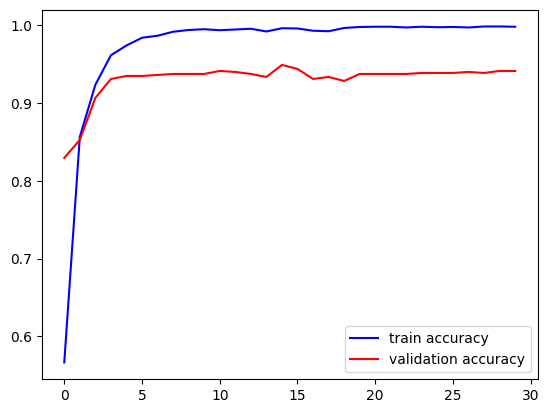

In [146]:
plt.plot(history_emd.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_emd.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [147]:
from keras.models import save_model

# Save the model to an HDF5 file
save_model(BiLSTM_model, 'BiLSTM_model.h5')

<ipython-input-147-c11448a059f8>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(BiLSTM_model, 'BiLSTM_model.h5')


In [148]:
from keras.models import load_model

model = load_model('BiLSTM_model.h5')

In [149]:
pred = BiLSTM_model.predict(X_test_pad)

25/25 [==============================] - 2s 74ms/step


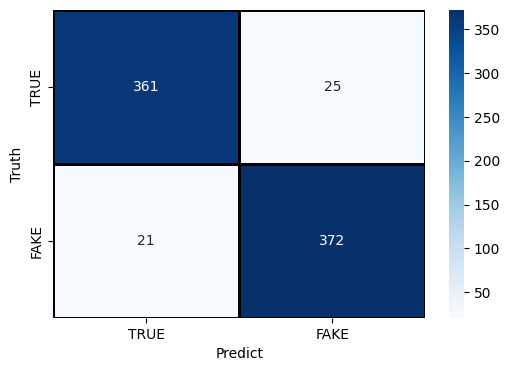

In [150]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, pred.round())
matrix = pd.DataFrame(matrix, index = ['TRUE', 'FAKE'], columns = ['TRUE', 'FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(matrix,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'])
plt.ylabel('Truth')
plt.xlabel('Predict')
plt.show()

In [151]:
text = 'Hôm nay (1/12), Đại hội XIII Công đoàn Việt Nam, nhiệm kỳ 2023-2028 khai mạc tại Hà Nội. Tham dự Đại hội có 1.100 đại biểu chính thức đại diện cho hơn 11 triệu đoàn viên công đoàn trong cả nước. Đại hội sẽ tập trung thảo luận về 3 khâu đột phá nhằm nâng cao chất lượng hoạt động công đoàn.Đại hội là sự kiện chính trị trọng đại của giai cấp công nhân và người lao động, có ý nghĩa rất quan trọng, mở đầu cho giai đoạn phát triển mới của tổ chức công đoàn, nhất là sau 10 năm thực hiện Luật Công đoàn 2012, hơn 2 năm thực hiện Nghị quyết số 02-NQ/TW ngày 12/6/2021 của Bộ Chính trị về "Đổi mới tổ chức và hoạt động Công đoàn Việt Nam trong tình hình mới". Công đoàn Việt Nam đã có nhiều đổi mới về nội dung, phương thức hoạt động, đạt nhiều kết quả quan trọng trên nhiều lĩnh vực.Với phương châm "Đổi mới - Dân chủ - Đoàn kết - Phát triển", Đại hội có nhiệm vụ đánh giá kết quả thực hiện Nghị quyết Đại hội XII Công đoàn Việt Nam; xác định mục tiêu, nhiệm vụ nhiệm kỳ 2023-2028; kiểm điểm sự lãnh đạo, chỉ đạo của Ban Chấp hành Tổng Liên đoàn Lao động Việt Nam khóa XII, bầu Ban Chấp hành Tổng Liên đoàn Lao động Việt Nam khóa XIII; đánh giá việc thi hành và thông qua Điều lệ Công đoàn Việt Nam (sửa đổi, bổ sung).Trong sáng nay (1/12), Đoàn Chủ tịch Tổng Liên đoàn cùng toàn thể đại biểu Đại hội vào Lăng viếng Chủ tịch Hồ Chí Minh, dâng hương tưởng niệm các Anh hùng liệt sỹ tại Đài liệt sỹ Bắc Sơn, sau đó bước vào phiên làm việc thứ nhất.Dự kiến, Đại hội sẽ cho ý kiến thảo luận về 3 khâu đột phá gồm: Đẩy mạnh đối thoại, thương lượng tập thể, trọng tâm là tiền lương, tiền thưởng, thời giờ làm việc, thời giờ nghỉ ngơi, an toàn vệ sinh lao động; tập trung phát triển đoàn viên, thành lập công đoàn cơ sở ở các doanh nghiệp ngoài khu vực nhà nước; xây dựng đội ngũ chủ tịch công đoàn cơ sở đáp ứng yêu cầu nhiệm vụ, nhất là chủ tịch công đoàn tại doanh nghiệp ngoài khu vực nhà nước.Đại hội XIII Công đoàn Việt Nam: Đổi mới - Dân chủ - Đoàn kết - Phát triển - Ảnh 1.Đoàn Chủ tịch Tổng Liên đoàn cùng toàn thể đại biểu Đại hội vào Lăng viếng Chủ tịch Hồ Chí Minh sáng 1/12.Trước thềm đại hội, 10 diễn đàn chuyên đề đã được tổ chức để đại biểu bàn về 10 nội dung lớn trong hoạt động của Công đoàn Việt Nam.Tại phiên thứ nhất, Đại hội bầu Đoàn Chủ tịch, Đoàn Thư ký, Ban Thẩm tra tư cách đại biểu Đại hội; thông qua chương trình làm việc và quy chế của Đại hội; báo cáo kết quả thẩm tra tư cách đại biểu Đại hội; trình bày tổng quát Báo cáo của Ban Chấp hành Tổng Liên đoàn Lao động Việt Nam khóa XII trình Đại hội; báo cáo kiểm điểm của Ban Chấp hành Tổng Liên đoàn Lao động Việt Nam khóa XII; báo cáo về sửa đổi, bổ sung Điều lệ Công đoàn Việt Nam.Phát biểu khai mạc ngày làm việc đầu tiên của Đại hội XIII Công đoàn Việt Nam, Ủy viên Ban Chấp hành Trung ương Đảng, Chủ tịch Tổng LĐLĐ Việt Nam khóa XII Nguyễn Đình Khang đề nghị các đại biểu tập trung trí tuệ với tất cả tâm huyết, làm việc với tinh thần trách nhiệm cao nhất, thực hiện tốt nhất nội dung, chương trình, quy chế Đại hội, góp phần vào thành công của Đại hội.Đồng chí Nguyễn Đình Khang cho biết: Nhiệm kỳ 2018 - 2023, Công đoàn Việt Nam thực hiện nhiệm vụ trong bối cảnh tình hình thế giới, trong nước có nhiều khó khăn so với dự báo. Tình hình thế giới biến động nhanh, phức tạp, khó lường, đặc biệt là tác động tiêu cực của đại dịch COVID-19 đã ảnh hưởng tới mọi mặt của đời sống, trong đó có việc làm, thu nhập, đời sống của đoàn viên, người lao động và hoạt động công đoàn.Trong bối cảnh đó, với quyết tâm vượt qua khó khăn, phát huy truyền thống, tinh thần năng động, sáng tạo, vì đoàn viên, người lao động, các cấp Công đoàn tiếp tục đổi mới nội dung, phương thức hoạt động, đề ra nhiều chủ trương, giải pháp, tổ chức thực hiện và hoàn thành cơ bản các mục tiêu, chỉ tiêu, nhiệm vụ Nghị quyết Đại hội XII Công đoàn Việt Nam."Trong những ngày này, hơn 11 triệu đoàn viên công đoàn và người lao động cả nước đang hướng về Đại hội, gửi trọn niềm tin và đặt kỳ vọng vào những quyết định sáng suốt của Đại hội. Tôi đề nghị mỗi đại biểu tập trung trí tuệ với tất cả tâm huyết, làm việc với tinh thần trách nhiệm cao nhất, thực hiện tốt nhất nội dung, chương trình, quy chế Đại hội, góp phần vào thành công của Đại hội", đồng chí Nguyễn Đình Khang đề nghị.Đại hội XIII Công đoàn Việt Nam: Đổi mới - Dân chủ - Đoàn kết - Phát triển - Ảnh 2.Đại hội sẽ cho ý kiến thảo luận về 3 khâu đột phá.Đại hội XIII Công đoàn Việt Nam diễn ra trong 3 ngày, từ ngày 1 - 3/12 năm 2023, có nhiệm vụ đánh giá khách quan, toàn diện việc thực hiện Nghị quyết Đại hội Công đoàn Việt Nam lần thứ XII, cụ thể hóa các chủ trương của Đảng về xây dựng giai cấp công nhân và tổ chức Công đoàn vững mạnh, kiểm điểm vai trò lãnh đạo của Ban Chấp hành, Đoàn Chủ tịch Tổng LĐLĐ Việt Nam khóa XII; xác định mục tiêu, phương hướng, nhiệm vụ phong trào công nhân, viên chức, lao động và hoạt động công đoàn 5 năm tới; sửa đổi, bổ sung Điều lệ Công đoàn; bầu Ban Chấp hành Tổng Liên đoàn khóa mới thực sự tiêu biểu về phẩm chất, chính trị, đạo đức, năng lực công tác, có bản lĩnh, trí tuệ, tâm huyết, trách nhiệm, đáp ứng yêu cầu lãnh đạo thực hiện Nghị quyết Đại hội XIII Công đoàn Việt Nam.'

In [152]:
def preprocess_demo(text):
    text = re.sub(r'\d+', ' ', text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^`{|}~"""), ' ', text)
    text = text.replace('؛', "")
    text = re.sub('\s+', ' ', text)
    text = " ".join(text.split())
    text = text.strip()
    text = remove_stopwords(text)
    return text
def tokenize_text(text):
    return ViTokenizer.tokenize(text)

In [153]:
model_path = '/content/BiLSTM_model.h5'

# Tải mô hình từ tệp H5
loaded_model = load_model(model_path)

In [154]:
from sklearn.metrics import f1_score

predictions = loaded_model.predict(X_test_pad)
rounded_predictions = np.round(predictions).astype(int)
f1 = f1_score(y_test, rounded_predictions)

print("F1 score:", f1)

25/25 [==============================] - 4s 78ms/step
F1 score: 0.9417721518987342


In [155]:
text = tokenize_text(text)
text = preprocess_demo(text)

In [156]:
text = [text]

In [157]:
X_seq = tokenizer.texts_to_sequences(text)
X_pad=pad_sequences(X_seq, maxlen = 256, padding='post')

In [158]:
predictions = loaded_model.predict(X_pad)

1/1 [==============================] - 1s 908ms/step


In [159]:
predictions

array([[0.00221337]], dtype=float32)

In [160]:
predictions

array([[0.00221337]], dtype=float32)

In [161]:
if predictions >= 0.5:
    print("tin giả.")
else:
    print("tin thật.")

tin thật.
